In [8]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
import pandas as pd

In [10]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 76s 0us/step


In [11]:
data_dir

'.\\datasets\\flower_photos'

In [12]:
import pathlib

In [13]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [14]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [15]:
!pip install Pillow

In [16]:
import PIL

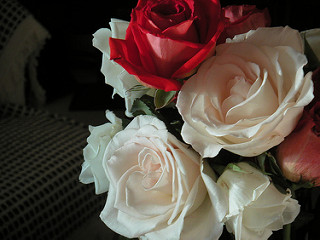

In [19]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

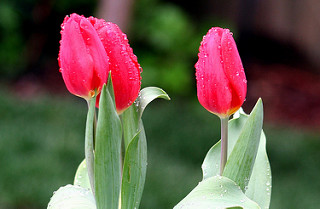

In [20]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [23]:
flowers_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),}

In [24]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,}

In [25]:
!pip install opencv-python

     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.1/38.1 MB 1.4 MB/s eta 0:00:27
     ---------------------------------------- 0.2/38.1 MB 2.0 MB/s eta 0:00:19
      --------------------------------------- 0.5/38.1 MB 2.7 MB/s eta 0:00:14
      --------------------------------------- 0.6/38.1 MB 2.7 MB/s eta 0:00:14
      --------------------------------------- 0.9/38.1 MB 3.7 MB/s eta 0:00:11
     - -------------------------------------- 1.2/38.1 MB 4.0 MB/s eta 0:00:10
     - -------------------------------------- 1.4/38.1 MB 3.9 MB/s eta 0:00:10
     - -------------------------------------- 1.5/38.1 MB 3.8 MB/s eta 0:00:10
     - -------------------------------------- 1.5/38.1 MB 3.8 MB/s eta 0:00:10
     - -------------------------------------- 1.5/38.1 MB 3.8 MB/s eta 0:00:10
     - -------------------------------------- 1.5/38.1 MB 3.8 MB/s

In [28]:
str(flowers_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [30]:
import cv2
img=cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [32]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [37]:
X,y=[],[]
for flower_name,images in flowers_image_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [39]:
X=np.array(X)
y=np.array(y)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [41]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [43]:
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
     layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
     layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5),
])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 37s 416ms/step - loss: 1.3420 - accuracy: 0.4226
Epoch 2/30
86/86 [==============================] - 100s 1s/step - loss: 1.0200 - accuracy: 0.5923
Epoch 3/30
86/86 [==============================] - 109s 1s/step - loss: 0.8547 - accuracy: 0.6708
Epoch 4/30
86/86 [==============================] - 112s 1s/step - loss: 0.6647 - accuracy: 0.7529
Epoch 5/30
86/86 [==============================] - 108s 1s/step - loss: 0.5106 - accuracy: 0.8038
Epoch 6/30
86/86 [==============================] - 68s 784ms/step - loss: 0.3102 - accuracy: 0.8953
Epoch 7/30
86/86 [==============================] - 31s 358ms/step - loss: 0.1601 - accuracy: 0.9502
Epoch 8/30
86/86 [==============================] - 26s 306ms/step - loss: 0.0852 - accuracy: 0.9753
Epoch 9/30
86/86 [==============================] - 27s 312ms/step - loss: 0.0704 - accuracy: 0.9789
Epoch 10/30
86/86 [==============================] - 29s 332ms/step - loss: 0.0471 - accuracy: 0.98

In [45]:
model.evaluate(X_test_scaled,y_test)
predicitions=model.predict(X_test_scaled)
predicitions

29/29 [==============================] - 2s 76ms/step


array([[ -0.5132426 ,  26.938145  ,  -2.546285  ,  -5.302779  ,
        -11.238798  ],
       [  4.934981  ,   0.21416   , -13.284454  ,  -2.121674  ,
          5.5911946 ],
       [ -7.6368055 ,   8.67839   ,  16.383444  ,  -0.8741133 ,
         -3.105391  ],
       ...,
       [ -0.3699452 ,  -2.4019194 , -16.221989  ,   5.664721  ,
          6.2313957 ],
       [  5.5146036 ,   4.3600993 ,  -7.659755  ,  -0.23442101,
         -5.2500987 ],
       [  2.6151898 , -12.238068  ,  -0.6317425 ,   9.018745  ,
         -0.03528352]], dtype=float32)

In [46]:
score=tf.nn.softmax(predicitions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.1967789e-12, 1.0000000e+00, 1.5670202e-13, 9.9527760e-15,
       2.6300573e-17], dtype=float32)>

In [48]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

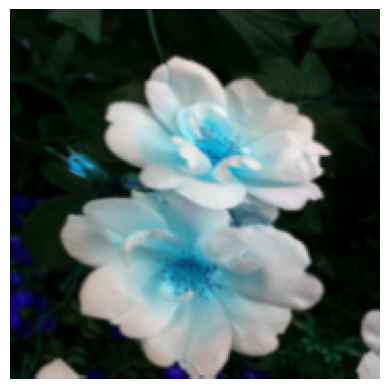

In [49]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [50]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 37s 419ms/step - loss: 1.2321 - accuracy: 0.4891
Epoch 2/30
86/86 [==============================] - 37s 426ms/step - loss: 0.9841 - accuracy: 0.6159
Epoch 3/30
86/86 [==============================] - 39s 457ms/step - loss: 0.8957 - accuracy: 0.6581
Epoch 4/30
86/86 [==============================] - 40s 461ms/step - loss: 0.8450 - accuracy: 0.6613
Epoch 5/30
86/86 [==============================] - 39s 456ms/step - loss: 0.7783 - accuracy: 0.6959
Epoch 6/30
86/86 [==============================] - 40s 462ms/step - loss: 0.7316 - accuracy: 0.7173
Epoch 7/30
86/86 [==============================] - 40s 470ms/step - loss: 0.7065 - accuracy: 0.7333
Epoch 8/30
86/86 [==============================] - 38s 445ms/step - loss: 0.6931 - accuracy: 0.7438
Epoch 9/30
86/86 [==============================] - 41s 480ms/step - loss: 0.6535 - accuracy: 0.7551
Epoch 10/30
86/86 [==============================] - 40s 463ms/step - loss: 0.6360 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)